In [2]:
import pandas as pd
import numpy as np
import os
import openpyxl
import string as str
import warnings
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings(action="ignore")

#### 데이터 출처 : https://www.fatsecret.kr/%EC%B9%BC%EB%A1%9C%EB%A6%AC-%EC%98%81%EC%96%91%EC%86%8C/search

In [4]:
data = pd.read_excel("./data/편의점.xlsx")
copy_data = data

### 데이터 결측값 제거
- 모든 영양소가 NaN값 있는지 확인(크롤링할 때 예외값 처리를 모든 영양소값을 NaN값으로 처리했음)
- 영양분에서의 NAN값은 영양분이 없는 것이므로 0으로 대체해준다.
- 그 외 NaN값은 판단 후  대체 or 제거해준다.

In [3]:
# column(변수)에 따른 결측값 개수 합
copy_data.isnull().sum()

편의점             0
상품명             0
단위량(g/ml)      10
kcal            0
탄수화물            0
설탕당             5
단백질             0
지방              0
포화지방           16
트랜스지방         265
콜레스테롤          18
식이섬유         3753
나트륨             4
칼륨           3780
dtype: int64

In [4]:
# 특정열에 결측값 있는 행만 추출 : df[df["칼럼명"].isnull()]]
copy_data[copy_data["단위량(g/ml)"].isnull()]
copy_data[copy_data["설탕당"].isnull()]
copy_data[copy_data["포화지방"].isnull()]
copy_data[copy_data["콜레스테롤"].isnull()]
copy_data[copy_data["나트륨"].isnull()]

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
2998,세븐일레븐,구운란,70,90,2.0,NaN,10.0,4.8,1.7,NaN,NaN,NaN,NaN,250.0
3078,세븐일레븐,구운란,70,90,2.0,NaN,10.0,4.8,1.7,NaN,NaN,NaN,NaN,250.0
3480,세븐일레븐,하하호호 훈제맛계란,35,65,2.0,NaN,6.0,3.7,1.2,NaN,NaN,NaN,NaN,130.0
3678,세븐일레븐,미니언즈란,50,70,1.0,NaN,7.0,4.6,1.9,NaN,NaN,NaN,NaN,185.0


#### 영양소 nan값 0으로 대체

In [5]:
# 결측값 대체
copy_data["설탕당"] = np.where(pd.notnull(copy_data["설탕당"]) == True,copy_data["설탕당"],0)
copy_data["포화지방"] = np.where(pd.notnull(copy_data["포화지방"]) == True,copy_data["포화지방"],0)
copy_data["트랜스지방"] = np.where(pd.notnull(copy_data["트랜스지방"]) == True,copy_data["트랜스지방"],0)
copy_data["콜레스테롤"] = np.where(pd.notnull(copy_data["콜레스테롤"]) == True,copy_data["콜레스테롤"],0)
copy_data["식이섬유"] = np.where(pd.notnull(copy_data["식이섬유"]) == True,copy_data["식이섬유"],0)
copy_data["나트륨"] = np.where(pd.notnull(copy_data["나트륨"]) == True,copy_data["나트륨"],0)
copy_data["칼륨"] = np.where(pd.notnull(copy_data["칼륨"]) == True,copy_data["칼륨"],0)

In [6]:
# 결측값 대체 되었는지 확인
copy_data.isnull().sum()

편의점           0
상품명           0
단위량(g/ml)    10
kcal          0
탄수화물          0
설탕당           0
단백질           0
지방            0
포화지방          0
트랜스지방         0
콜레스테롤         0
식이섬유          0
나트륨           0
칼륨            0
dtype: int64

#### 단위량 NaN값 판단 후 처리
- 개수가 적으니 제거

In [6]:
copy_data[copy_data["단위량(g/ml)"].isnull()]

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
174,GS25,오븐에 구운 파운드,NaN,237,26.0,12.5,2.0,14.0,7.0,0.0,33.0,0.0,96.0,0.0
1306,GS25,마이홍더블비프버거,NaN,626,37.0,6.0,22.0,37.0,1.0,0.0,0.0,0.0,1158.0,0.0
1685,CU,베이컨 샌드위치,NaN,346,38.0,5.0,17.0,14.0,5.0,0.0,37.0,0.0,930.0,0.0
1940,CU,불닭김밥,NaN,325,52.0,5.0,9.0,9.0,3.4,0.2,18.0,0.0,930.0,0.0
2835,CU,치킨시저 더블스테이크 버거,NaN,553,37.0,12.0,18.0,37.0,11.0,0.6,60.0,0.0,980.0,0.0
2855,CU,팔도진미 전라도편,NaN,615,86.0,13.0,25.0,19.0,6.0,0.1,82.0,0.0,933.0,0.0
2987,CU,비프함박,NaN,931,91.0,18.0,36.0,47.0,13.0,0.6,226.0,0.0,1137.0,0.0
3039,세븐일레븐,맥적구이 삼각김밥,NaN,185,33.0,3.0,4.0,4.0,0.0,0.0,0.0,0.0,620.0,0.0
3500,세븐일레븐,강릉초당순두부라면,NaN,475,65.0,4.0,11.0,19.0,0.0,0.0,0.0,0.0,1710.0,0.0
3515,세븐일레븐,두부김치제육,NaN,582,87.0,5.0,23.0,16.0,3.3,0.0,21.0,0.0,923.0,0.0


In [7]:
# 결측값 있는 행 제거
# 단위량 변수밖에 없으므로 전체 데이터에서 지워준다.
copy_data = copy_data.dropna(axis = 0)

In [8]:
# 제거 되었는지 확인
copy_data[copy_data["단위량(g/ml)"].isnull()]

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨


#### 데이터타입 확인

In [9]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3776 entries, 0 to 3785
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   편의점        3776 non-null   object 
 1   상품명        3776 non-null   object 
 2   단위량(g/ml)  3776 non-null   object 
 3   kcal       3776 non-null   int64  
 4   탄수화물       3776 non-null   float64
 5   설탕당        3776 non-null   float64
 6   단백질        3776 non-null   float64
 7   지방         3776 non-null   float64
 8   포화지방       3776 non-null   float64
 9   트랜스지방      3776 non-null   float64
 10  콜레스테롤      3776 non-null   float64
 11  식이섬유       3776 non-null   float64
 12  나트륨        3776 non-null   float64
 13  칼륨         3776 non-null   float64
dtypes: float64(10), int64(1), object(3)
memory usage: 442.5+ KB


#### 단위량이 object 나온 이유 파악하기
- 숫자 이외의 값들도 들어있음 --> 개수확인하고 제거해주기
- 원본 확인해도 수치 없음

In [10]:
special_item_list_number = [278,513,999,1186,1414,2091]
print(copy_data.iloc[special_item_list_number])

       편의점         상품명 단위량(g/ml)  kcal   탄수화물   설탕당   단백질    지방  포화지방  트랜스지방  \
279   GS25        레몬녹차        1병   116   17.0  17.0   0.0   0.0   0.0    0.0   
514   GS25      더블비프버거        1개   432   37.0   6.2  19.4  22.9   8.3    0.4   
1000  GS25       치즈라볶이     치즈포함    726  127.0  32.0  13.5  18.3   9.4    0.2   
1187  GS25        밥풀과자       1봉지   275   62.0  19.0   5.0   0.0   0.0    0.0   
1416  GS25  삼진통어묵 삼각김밥        1개   207   36.0   3.0   6.0   4.5   0.8    0.0   
2095    CU     매콤고등어정식    도시락 1개   554   80.0   4.0  27.0  14.0   0.2    4.8   

      콜레스테롤  식이섬유     나트륨   칼륨  
279     0.0   0.0    20.0  0.0  
514    54.0   0.0   841.0  0.0  
1000   15.0   0.0  1382.0  0.0  
1187    0.0   0.0    30.0  0.0  
1416    7.0   0.0   533.0  0.0  
2095  118.0   0.0   735.0  0.0  


In [11]:
# 원본에도 수치 없으므로 제거
special_item_list_index = copy_data[(copy_data["단위량(g/ml)"] == "1병") | (copy_data["단위량(g/ml)"] == "1개") | (copy_data["단위량(g/ml)"] == "1봉지") | (copy_data["단위량(g/ml)"] == "도시락 1개") | (copy_data["단위량(g/ml)"] == "치즈포함 ")].index

copy_data.drop(special_item_list_index,axis = "index", inplace = True)

In [12]:
# 데이터타입 바꾸기
copy_data["단위량(g/ml)"] = copy_data["단위량(g/ml)"] .astype("float")

In [13]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3770 entries, 0 to 3785
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   편의점        3770 non-null   object 
 1   상품명        3770 non-null   object 
 2   단위량(g/ml)  3770 non-null   float64
 3   kcal       3770 non-null   int64  
 4   탄수화물       3770 non-null   float64
 5   설탕당        3770 non-null   float64
 6   단백질        3770 non-null   float64
 7   지방         3770 non-null   float64
 8   포화지방       3770 non-null   float64
 9   트랜스지방      3770 non-null   float64
 10  콜레스테롤      3770 non-null   float64
 11  식이섬유       3770 non-null   float64
 12  나트륨        3770 non-null   float64
 13  칼륨         3770 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 441.8+ KB


#### 데이터 엑셀로 저장

In [14]:
# copy_data.to_excel("new_data.xlsx")

## Q1. 각 편의점별 상품 개수

([<matplotlib.axis.XTick at 0x25149295340>,
 [Text(0, 0, 'CU'), Text(1, 0, 'GS25'), Text(2, 0, 'SEVEN')])

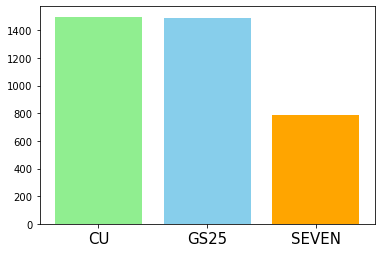

In [14]:
count = copy_data.groupby(copy_data["편의점"]).size()
label = ["CU","GS25","SEVEN"]
index = np.arange(len(label))

# Bar plot
plt.bar(index,count, color = ["lightgreen","skyblue","orange"])
plt.xticks(index,label,fontsize =15)

## Q2. 단위량 대비 kcal 제일 높은 식품
- (kcal / 단위량) 상위 Top 10
- (kcal / 단위량) 하위 TOP 10

In [28]:
kcal_data = copy_data[["상품명","편의점","단위량(g/ml)","kcal"]]
kcal_data["kcal/단위량"] = (kcal_data["kcal"] / kcal_data["단위량(g/ml)"])

### Q2-1 (kcal / 단위량) 상위 Top 10

In [16]:
kcal_data.sort_values("kcal/단위량", ascending=False).head(10)

,상품명,편의점,단위량(g/ml),kcal,kcal/단위량
2073,빽햄김치볶음,CU,10.0,199,19.900000
2997,초코마카롱도넛,CU,70.0,1109,15.842857
2538,커피앤버터쿠키,CU,34.0,311,9.147059
3531,수미네 풍성한 도시락,세븐일레븐,100.0,790,7.900000
952,키토제닉 메이트팩,GS25,20.0,149,7.450000
1731,바싹불고기,CU,100.0,741,7.410000
1551,우삼겹 덮밥,CU,100.0,728,7.280000
1402,바르셀로나 프리미엄 슈퍼너츠,GS25,28.0,195,6.964286
1483,오늘의만찬,GS25,100.0,696,6.960000
3408,차슈덮밥,세븐일레븐,100.0,665,6.650000


- 주로 식사 식품들이 단위량(1g) 대비 kcal가 많이 들어있음

### Q2-2 (kcal / 단위량) 하위 TOP 10

In [17]:
kcal_data.sort_values("kcal/단위량").head(10)

,상품명,편의점,단위량(g/ml),kcal,kcal/단위량
3213,복숭아워터젤리,세븐일레븐,340.0,6,0.017647
243,아메리카노 블랙,GS25,230.0,5,0.021739
424,콜드브루 블랙,GS25,340.0,10,0.029412
3195,콜롬비아 마일드,세븐일레븐,320.0,10,0.031250
3575,향이 풍부한 아메리카노,세븐일레븐,250.0,8,0.032000
885,유동브루잉커피,GS25,500.0,17,0.034000
272,CAFE25 아메리카노 블랙,GS25,500.0,20,0.040000
1639,블랙 아메리카노,CU,230.0,10,0.043478
1367,아이스블럭 피치,GS25,200.0,20,0.100000
1107,아이스블럭 오렌지,GS25,200.0,25,0.125000


- 주로 음료류(마실 것)가 단위량(1ml) 대비 칼로리가 적게 들어있음

## Q3 주요 영양소별(탄수화물,단백질,지방) TOP10 식품
- 편의점별 탄/단/지 Top10 식품

#### 편의점 데이터 만들기

In [22]:
gs25 = copy_data.loc[copy_data.편의점 == "GS25",:]
cu = copy_data.loc[copy_data.편의점 == "CU",:]
seven = copy_data.loc[copy_data.편의점 == "세븐일레븐",:]

### Q3-1 GS25

In [44]:
gs25.sort_values(by = ["탄수화물"], axis = 0, ascending = False).head(11)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
450,GS25,대왕 돈까스 스파게티,544.0,1387,220.0,18.0,48.0,35.0,4.0,0.0,119.0,0.0,1259.0,0.0
1303,GS25,돈카츄커리 스파게티,455.0,1096,169.0,19.0,42.0,28.0,9.0,0.0,42.0,0.0,1275.0,0.0
173,GS25,추억의 떡볶이,300.0,680,154.0,31.0,12.0,2.1,0.0,0.0,0.0,0.0,1800.0,0.0
671,GS25,위대한 짜볶이,263.0,705,146.0,14.0,15.0,7.0,1.2,0.0,5.0,0.0,1650.0,0.0
1372,GS25,치킨몬스터도시락,489.0,1058,142.0,28.0,36.0,38.0,9.0,0.2,132.0,0.0,2950.0,0.0
1141,GS25,치킨몬스터 도시락,489.0,1058,142.0,28.0,36.0,38.0,9.0,0.2,132.0,0.0,2950.0,0.0
1051,GS25,매콤로제치킨파스타,399.0,902,141.0,12.0,35.0,22.0,6.0,0.0,40.0,0.0,796.0,0.0
1471,GS25,2가지 고기 많은 도시락,461.0,851,141.0,10.0,29.0,19.0,8.0,0.2,124.0,0.0,1066.0,0.0
557,GS25,위대한 라볶이,263.0,635,138.0,20.0,13.0,3.5,1.0,0.0,5.0,0.0,1760.0,0.0
1347,GS25,진짜진짜많구나,472.0,940,136.0,7.0,37.0,28.0,8.0,0.0,190.0,0.0,1720.0,0.0


In [31]:
gs25.sort_values(by = ["단백질"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
845,GS25,매운간장찜닭,560.0,765,106.0,32.0,56.0,13.0,3.4,0.0,195.0,0.0,2940.0,0.0
273,GS25,부드러운 순살족발,200.0,367,2.0,1.0,55.0,16.0,6.0,0.0,239.0,0.0,665.0,0.0
961,GS25,완전크닭 도시락,510.0,943,89.0,1.0,55.0,41.0,2.8,0.0,173.0,0.0,1623.0,0.0
948,GS25,양념치킨 도시락,452.0,826,93.0,2.0,49.0,29.0,9.0,0.3,352.0,0.0,1026.0,0.0
450,GS25,대왕 돈까스 스파게티,544.0,1387,220.0,18.0,48.0,35.0,4.0,0.0,119.0,0.0,1259.0,0.0
1341,GS25,매콤고등어&너비아니 도시락,430.0,922,102.0,9.0,44.0,38.0,10.0,0.0,178.0,0.0,1420.0,0.0
1371,GS25,완전크닭 리턴즈,495.0,926,101.0,17.0,44.0,39.0,12.0,0.0,140.0,0.0,2134.0,0.0
673,GS25,찬또볶음면,460.0,859,72.0,17.0,44.0,44.0,6.0,0.1,218.0,0.0,1741.0,0.0
1237,GS25,그때 그 도시락,352.0,781,93.0,13.0,43.0,26.0,4.2,0.0,227.0,0.0,2844.0,0.0
1303,GS25,돈카츄커리 스파게티,455.0,1096,169.0,19.0,42.0,28.0,9.0,0.0,42.0,0.0,1275.0,0.0


In [43]:
gs25.sort_values(by = ["지방"], axis = 0, ascending = False).head(11)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
181,GS25,황금 왕돈까스 도시락,517.0,1117,113.0,15.0,38.0,57.0,14.0,0.7,43.0,0.0,1859.0,0.0
688,GS25,황금왕돈까스도시락,517.0,1117,113.0,15.0,38.0,57.0,14.0,0.7,43.0,0.0,1859.0,0.0
822,GS25,허쉬초코트라이플,335.0,1066,129.0,99.0,16.0,54.0,35.0,0.3,100.0,0.0,420.0,0.0
1144,GS25,대왕소시지 도시락,444.0,980,103.0,6.0,29.0,50.0,9.0,0.0,60.0,0.0,1564.0,0.0
416,GS25,큐브스테이크 도시락,434.0,1076,83.0,31.0,24.0,48.0,22.0,0.0,152.0,0.0,1798.0,0.0
1292,GS25,따블 벌거,273.0,873,80.0,9.0,37.0,45.0,2.1,0.0,23.0,0.0,1615.0,0.0
673,GS25,찬또볶음면,460.0,859,72.0,17.0,44.0,44.0,6.0,0.1,218.0,0.0,1741.0,0.0
386,GS25,머릿고기,150.0,556,8.0,0.0,35.0,43.0,15.0,0.2,141.0,0.0,453.0,0.0
625,GS25,빅사이즈 불고기 버거,226.0,679,58.0,17.0,18.0,42.0,9.0,0.0,37.0,0.0,1199.0,0.0
208,GS25,뭉게뭉게란,162.0,445,7.0,3.0,10.0,42.0,7.0,0.0,145.0,0.0,720.0,0.0


### Q3-2 CU

In [36]:
cu.sort_values(by = ["탄수화물"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
1708,CU,자이언트 쫄볶이,320.0,700,158.0,26.0,15.0,2.6,1.0,0.0,0.0,0.0,1980.0,0.0
2122,CU,한입 돈까스,505.0,1375,157.0,8.0,36.0,67.0,7.0,0.1,96.0,0.0,2463.0,0.0
1603,CU,대왕돈까스,505.0,1375,157.0,8.0,36.0,67.0,7.0,0.1,96.0,0.0,2493.0,0.0
2363,CU,까스왕,563.0,1255,152.0,23.0,38.0,55.0,13.0,0.0,64.0,0.0,1794.0,0.0
2522,CU,자이언트 마늘떡볶이,300.0,670,150.0,20.0,13.0,2.4,0.6,0.0,0.0,0.0,1550.0,0.0
1720,CU,자이언트 라볶이,300.0,690,149.0,24.0,17.0,3.3,0.9,0.0,0.0,0.0,1840.0,0.0
2975,CU,자떡라볶이,300.0,685,147.0,25.0,18.0,3.2,0.7,0.0,0.0,0.0,1930.0,0.0
2589,CU,맘모쑥,245.0,768,142.0,61.0,14.0,16.0,8.0,0.0,10.0,0.0,420.0,0.0
1980,CU,제주 흑돼지 비빔밥,503.0,925,140.0,15.0,35.0,25.0,8.0,0.0,75.0,0.0,2641.0,0.0
2541,CU,자이언트 매콤까르보떡볶이,330.0,700,138.0,8.0,14.0,11.0,6.0,0.0,0.0,0.0,1180.0,0.0


In [37]:
cu.sort_values(by = ["단백질"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
2686,CU,매콤치즈콘닭,360.0,633,34.0,3.0,59.0,29.0,11.0,0.0,171.0,0.0,34.0,0.0
1919,CU,마늘족반 불족반,284.0,584,35.0,18.0,57.0,24.0,9.0,0.0,217.0,0.0,1557.0,0.0
2914,CU,투머치하닭,435.0,796,73.0,17.0,54.0,32.0,8.0,0.1,299.0,0.0,1916.0,0.0
2084,CU,눈꽃치즈닭갈비,496.0,887,83.0,22.0,51.0,39.0,15.0,0.3,202.0,0.0,2478.0,0.0
1850,CU,수 정찬,498.0,1068,119.0,18.0,49.0,44.0,12.0,0.3,94.0,0.0,2274.0,0.0
1549,CU,안동식 찜닭 정식,465.0,871,127.0,20.0,48.0,19.0,13.0,0.2,120.0,0.0,1268.0,0.0
1683,CU,장충동 부드러운 순살 족발,150.0,381,0.0,0.0,48.0,21.0,8.0,0.0,168.0,0.0,406.0,0.0
2281,CU,리얼BIG직화스파이시치킨,220.0,315,11.0,2.0,47.0,9.0,2.8,0.0,145.0,0.0,1250.0,0.0
2755,CU,덕분애정식,434.0,743,88.0,5.0,46.0,23.0,4.5,0.0,138.0,0.0,918.0,0.0
2751,CU,핫치닭,289.0,692,67.0,19.0,43.0,28.0,10.0,0.0,234.0,0.0,1802.0,0.0


In [38]:
cu.sort_values(by = ["지방"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
2122,CU,한입 돈까스,505.0,1375,157.0,8.0,36.0,67.0,7.0,0.1,96.0,0.0,2463.0,0.0
1603,CU,대왕돈까스,505.0,1375,157.0,8.0,36.0,67.0,7.0,0.1,96.0,0.0,2493.0,0.0
2917,CU,3XL치킨버거,402.0,1136,124.0,26.0,34.0,56.0,11.0,0.5,70.0,0.0,1000.0,0.0
2363,CU,까스왕,563.0,1255,152.0,23.0,38.0,55.0,13.0,0.0,64.0,0.0,1794.0,0.0
1567,CU,백종원 매콤 돈까스정식,580.0,1130,135.0,21.0,26.0,54.0,11.0,0.0,44.0,0.0,1322.0,0.0
2014,CU,우삼겹 정식,435.0,907,97.0,10.0,24.0,47.0,14.0,0.6,72.0,0.0,1457.0,0.0
2018,CU,트리플 불고기 치즈버거,220.0,694,47.0,17.0,23.0,46.0,15.0,0.4,115.0,0.0,1640.0,0.0
2167,CU,마성의 돈까스,460.0,1076,136.0,23.0,34.0,44.0,10.0,0.5,53.0,0.0,1631.0,0.0
1850,CU,수 정찬,498.0,1068,119.0,18.0,49.0,44.0,12.0,0.3,94.0,0.0,2274.0,0.0
2969,CU,눈꽃치즈함박,354.0,832,74.0,18.0,35.0,44.0,14.0,0.7,113.0,0.0,1996.0,0.0


### Q3-3 세븐일레븐

In [39]:
seven.sort_values(by = ["탄수화물"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
3387,세븐일레븐,차갑닭강정,484.0,2330,170.0,58.0,59.0,157.0,25.0,0.5,250.0,0.0,2940.0,0.0
3267,세븐일레븐,매콤제육불고기 도시락,438.0,898,158.0,9.0,35.0,14.0,3.5,0.0,66.0,0.0,1183.0,0.0
3469,세븐일레븐,더커진 국물떡볶이,300.0,690,154.0,27.0,13.0,3.2,0.9,0.0,3.0,0.0,1320.0,0.0
3155,세븐일레븐,수제등심돈까스 도시락,478.0,996,141.0,1.0,40.0,30.0,13.3,0.7,115.0,0.0,800.0,0.0
3283,세븐일레븐,든든한 장군비빔밥,517.0,840,130.0,27.0,21.0,26.0,4.7,0.5,14.0,0.0,1970.0,0.0
3289,세븐일레븐,식빵 2cm,255.0,705,129.0,14.0,18.0,13.0,8.0,0.5,0.0,0.0,1590.0,0.0
3644,세븐일레븐,쌈밥정식 도시락,425.0,750,128.0,22.0,32.0,13.0,1.4,0.0,50.0,0.0,1450.0,0.0
3087,세븐일레븐,치즈라볶이,258.0,618,127.0,6.0,17.0,5.0,0.0,0.0,14.0,0.0,1260.0,0.0
3588,세븐일레븐,꼬마장군비빔밥,512.0,800,125.0,23.0,18.0,25.0,4.0,0.5,35.0,0.0,1860.0,0.0
3279,세븐일레븐,9겹 등심 돈까스 도시락,468.0,1010,123.0,13.0,36.0,42.0,4.7,0.0,50.0,0.0,1050.0,0.0


In [40]:
seven.sort_values(by = ["단백질"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
3387,세븐일레븐,차갑닭강정,484.0,2330,170.0,58.0,59.0,157.0,25.0,0.5,250.0,0.0,2940.0,0.0
3415,세븐일레븐,춘천식숯불닭갈비도시락,456.0,740,90.0,10.0,43.0,23.0,2.0,0.0,155.0,0.0,1470.0,0.0
3605,세븐일레븐,치밥도시락,417.0,770,95.0,15.0,42.0,25.0,7.0,0.0,155.0,0.0,1300.0,0.0
3272,세븐일레븐,도시락의정석 양념&오븐구이치킨편,441.0,830,94.0,12.0,42.0,32.0,5.0,0.5,105.0,0.0,1680.0,0.0
3259,세븐일레븐,오모가리 돼지 김치찌개 도시락,414.0,820,85.0,20.0,41.0,35.0,7.0,0.0,60.0,0.0,2450.0,0.0
3221,세븐일레븐,도시락의정석 꽈리고추&치킨,471.0,840,112.0,30.0,41.0,25.0,5.0,0.2,35.0,0.0,1920.0,0.0
3375,세븐일레븐,도시락의 정석 꽈리고추 치킨편,471.0,840,112.0,30.0,41.0,25.0,5.0,0.2,35.0,0.0,1920.0,0.0
3399,세븐일레븐,마늘보쌈 도시락,422.0,785,85.0,20.0,41.0,31.0,6.0,0.5,75.0,0.0,1300.0,0.0
3154,세븐일레븐,깐풍기&소시지 도시락,493.0,870,101.0,19.0,40.0,34.0,9.0,0.2,35.0,0.0,1470.0,0.0
3155,세븐일레븐,수제등심돈까스 도시락,478.0,996,141.0,1.0,40.0,30.0,13.3,0.7,115.0,0.0,800.0,0.0


In [23]:
seven.sort_values(by = ["지방"], axis = 0, ascending = False).head(10)

,편의점,상품명,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
3387,세븐일레븐,차갑닭강정,484.0,2330,170.0,58.00,59.0,157.00,25.00,0.50,250.0,0.0,2940.0,0.0
3287,세븐일레븐,매콤마요닭강정,250.0,1060,60.0,16.00,21.0,82.00,12.00,0.50,60.0,0.0,730.0,0.0
3661,세븐일레븐,함박볼로네즈 스파게티,367.0,755,59.0,11.00,24.0,47.00,12.00,0.60,75.0,0.0,940.0,0.0
3026,세븐일레븐,함박&치킨까스 도시락,454.0,981,109.0,4.86,32.0,46.35,14.63,0.61,56.0,0.0,1620.0,0.0
3292,세븐일레븐,후라이드 통살치킨 버거,185.0,600,33.0,13.00,13.0,46.00,11.00,0.50,65.0,0.0,930.0,0.0
3766,세븐일레븐,후라이드통살치킨버거,185.0,600,33.0,13.00,13.0,46.00,11.00,0.50,65.0,0.0,930.0,0.0
3197,세븐일레븐,비프함박&토네이도소시지 도시락,453.0,953,105.0,15.13,31.0,45.12,14.59,0.54,60.0,0.0,1287.0,0.0
3255,세븐일레븐,도시락의정석 바싹불고기편,446.0,970,112.0,19.00,29.0,45.00,9.00,0.50,75.0,0.0,1330.0,0.0
3133,세븐일레븐,프렌즈 피크닉 박스,471.0,940,107.0,29.00,29.0,44.00,12.00,0.50,75.0,0.0,1920.0,0.0
3768,세븐일레븐,도시락의 정석(돼지불고기편),459.0,965,106.0,17.00,35.0,44.00,11.00,0.50,175.0,0.0,1480.0,0.0


- 탄/단/지가 많이 들어간 식품들 : 도시락(고기가 포함된 것), 햄버거, 치킨류, 떡볶이류
- 쌀,밀이 들어간 음식일수록 높음

### Q4 특정 식품별 영양소 평균 비교
- 도시락
- 삼각김밥

In [18]:
tri_riceroll = copy_data[copy_data["상품명"].str.endswith("삼각김밥")]
packed_lunch = copy_data[copy_data["상품명"].str.endswith("도시락")]

### Q4-1 편의점별 삼각김밥 영양소 평균

In [17]:
tri_riceroll.groupby("편의점").mean()

,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
편의점,,,,,,,,,,,,
CU,108.625000,194.943182,34.443182,1.723864,5.530682,3.887500,1.010114,0.005682,6.272727,0.0,353.284091,0.0
GS25,123.440000,220.024000,36.328000,2.180800,6.024000,5.565600,1.139760,0.033600,13.152000,0.0,453.248000,0.0
세븐일레븐,112.428571,198.226190,34.886905,2.710000,5.346429,3.958452,0.663333,0.091071,9.202381,0.0,452.857143,0.0


### Q4-2 편의점별 도시락 영양소 평균

In [19]:
packed_lunch.groupby("편의점").mean()

,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
편의점,,,,,,,,,,,,
CU,400.321429,739.250000,98.821429,12.750000,29.500000,25.107143,7.214286,0.089286,99.178571,0.0,1338.714286,0.0
GS25,407.773913,711.252174,93.904348,10.191304,28.121739,24.413043,5.800000,0.080870,119.373913,0.0,1336.565217,0.0
세븐일레븐,399.270833,748.666667,99.229167,12.317083,28.187500,25.982292,6.160417,0.374375,77.250000,0.0,1322.145833,0.0


- 가격이 비슷하다면 세븐일레븐에서 도시락은 안 사먹을 것 같다.(단위량, KCAL 기준으로)
- 삼각김밥과 도시락 kcal로는 도시락 1개 = 삼각김밥 3.5개와 비슷한 수준

### Q5 영양소별 상관관계

In [15]:
nutrient = copy_data.iloc[:,2:14]
nutrient.corr()

,단위량(g/ml),kcal,탄수화물,설탕당,단백질,지방,포화지방,트랜스지방,콜레스테롤,식이섬유,나트륨,칼륨
단위량(g/ml),1.000000,0.716482,0.731016,0.151117,0.716956,0.388636,0.107539,0.072576,0.003463,-0.062557,0.599555,-0.040465
kcal,0.716482,1.000000,0.867263,0.221110,0.776352,0.804249,0.476996,0.091011,0.016100,-0.036565,0.640943,-0.048278
탄수화물,0.731016,0.867263,1.000000,0.229739,0.603942,0.439921,0.226072,0.059852,-0.019490,-0.034250,0.606127,-0.057011
설탕당,0.151117,0.221110,0.229739,1.000000,-0.035517,0.220486,0.401847,0.038967,-0.001862,-0.001237,-0.133881,-0.032189
단백질,0.716956,0.776352,0.603942,-0.035517,1.000000,0.564692,0.219115,0.059592,0.031251,-0.046769,0.652998,-0.014043
지방,0.388636,0.804249,0.439921,0.220486,0.564692,1.000000,0.684745,0.104036,0.046902,-0.011163,0.402995,-0.028862
포화지방,0.107539,0.476996,0.226072,0.401847,0.219115,0.684745,1.000000,0.076761,0.056158,-0.013018,0.093385,-0.026314
트랜스지방,0.072576,0.091011,0.059852,0.038967,0.059592,0.104036,0.076761,1.000000,0.002812,-0.011612,0.076728,-0.006367
콜레스테롤,0.003463,0.016100,-0.019490,-0.001862,0.031251,0.046902,0.056158,0.002812,1.000000,-0.003912,0.010298,-0.002814
식이섬유,-0.062557,-0.036565,-0.034250,-0.001237,-0.046769,-0.011163,-0.013018,-0.011612,-0.003912,1.000000,-0.047675,0.024022


- 영양소 중 상관성이 제일 높은 것은 0.68로 지방-포화지방이고, 가장 낮은 것은 -0.0012 석이섬유-설탕당이다. 
- 3대 영양소끼리의 상관성은 탄수화물-단백질 : 0.6, 탄수화물-지방 : 0.44, 단백질-지방 : 0.56으로 각각 어느정도 상관성을 가진다.
- 3대 영양소와 칼로리와의 관계는 모두 (탄:0.87,단:0.78,지:0.8) 높게 나왔고, 나트륨 또한 0.64로 높게 나온다. 칼로리가 높은 식품일수록 나트륨을 포함한 3대 영양소를 많이 섭취한다.
- 몸에 안좋은 트랜스지방은 지방과의 상관성이 0.1로 낮은 상관관계를 가지기 때문에 지방이 높다고 트랜스지방을 많이 섭취하는 것은 아니다.

#### 추후 데이터 사용 방법
- 각자 즐겨먹는 식품 성분 비교(EX : 유제품)
- 가격 데이터 추가하여 가격을 통한 가성비 비교해보기
- 식품 분류 데이터를 추가하여 식품별로 분류하는 분석해보기